In [1]:
import pandas as pd

#### import the dataset of reviews

In [2]:
df=pd.read_csv("reviews.csv",sep=',')
df.head()

,Unnamed: 0,reviews
0,0,Okay. So you have been seeing people display t...
1,1,It's amazing..... battery last around 10 -12 h...
2,2,Finally a MacBook possession. Got it in 50k in...
3,3,Best Laptop under 60k. If you don't want any a...
4,4,Pros:1. Light weight and super fast response t...


#### checking the details ofinformation

In [3]:
data=df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 2 columns):
Unnamed: 0    3162 non-null int64
reviews       3162 non-null object
dtypes: int64(1), object(1)
memory usage: 49.5+ KB


In [4]:
data.shape

(3162, 2)

In [5]:
type(data['reviews'])

pandas.core.series.Series

In [6]:
data['reviews']

0       Okay. So you have been seeing people display t...
1       It's amazing..... battery last around 10 -12 h...
2       Finally a MacBook possession. Got it in 50k in...
3       Best Laptop under 60k. If you don't want any a...
4       Pros:1. Light weight and super fast response t...
5       I have been a Macbook pro user for last 2 year...
6       I am very upset about the product as I checked...
7       Reason for 1 star is I ot an defective piece. ...
8       Got the Apple Macbook air on amazon discount s...
9       White line coming on screen in just three mont...
10      Okay. So you have been seeing people display t...
11      It's amazing..... battery last around 10 -12 h...
12      Finally a MacBook possession. Got it in 50k in...
13      Best Laptop under 60k. If you don't want any a...
14      Pros:1. Light weight and super fast response t...
15      I have been a Macbook pro user for last 2 year...
16      I am very upset about the product as I checked...
17      Reason

#### Using regular expressions by defining a function 

In [7]:
import re # regular expressions
import string # to accept string 
import nltk # it is a text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.
from nltk.corpus import stopwords # particular words which are not neccesary in english
from nltk.stem import PorterStemmer# we use stemmer to remove the "ing" of words
def clean_text(text):
    ps=PorterStemmer()
    text1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)#remove url
    print(text1)
    text1=re.sub('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)#remove emojis
    print(text1)
    text1=re.sub("\s+"," ",x) # removing the space
    print(text1)
    text1=re.sub('#[\w]+', '', x) # removing 'hastags'
    print(text1)
    text_cleaned=" ".join([x for x in text1 if x not in string.punctuation])# remove punctuations
    print(text_cleaned)
    text_cleaned=text_cleaned.lower() #converting all words upper cases into lower case
    print(text_cleaned)
    text_cleaned=text_cleaned.split(" ")# splitting the words with space if neccessary
    print(text_cleaned)
    text_tokens=[token for token in text_cleaned if token not in STOPWORDS] # Prints list of all tokens in the document
    stem_words=[ps.stem(stem) for stem in text_tokens ] # the stem of all tokens in the document
    text=" ".join(stem_words)
    text_cleaned=re.sub(' +',' ',text)# for removing the extra space
    return text_cleaned

In [8]:
data['cleaned']=data['reviews'].apply(lambda x:re.sub('http.*','',x)) # removing the URL
data['cleaned']=data['cleaned'].apply(lambda x:re.sub("\s+"," ",x))# removing the space
data['cleaned'].head()

0    Okay. So you have been seeing people display t...
1    It's amazing..... battery last around 10 -12 h...
2    Finally a MacBook possession. Got it in 50k in...
3    Best Laptop under 60k. If you don't want any a...
4    Pros:1. Light weight and super fast response t...
Name: cleaned, dtype: object

In [9]:
data['cleaned'].tolist() # to check the reviews

['Okay. So you have been seeing people display their Macbooks and you have always fancied owning one of those premium devices. Now, as Amazon offers this Macbook Air at a reduced price, you are getting tempted to buy this. STOP and consider what you get for the money you spend. Do not buy this if you think this adds some premiumness to your profile. It will not - because this device is next in line where support will be withdrawn by Apple. Resist temptation - because THAT is what Apple sells. The last reason to buy should be your feeling that it improves your profile. Apple users will smirk when they see you with an obsolete \'dinosaur\' device as they display their latest toys.If you are a windows user - better go to some friend\'s Macbook and try some activities. MAC OS is great till you try to change something as puny as your mouse cursor!! You realise that you are stuck in the little cozy jail of Apple once you try anything non-standard. Try transferring data by a USB stick from yo

In [10]:
data['cleaned'] = data['cleaned'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) ## removing emojis

In [11]:
data['cleaned'] = data['cleaned'].apply(lambda x:re.sub('#[\w]+', '', x)) # removing '#'

In [12]:
data['cleaned'].head()

0    Okay. So you have been seeing people display t...
1    Its amazing..... battery last around 10 -12 hr...
2    Finally a MacBook possession. Got it in 50k in...
3    Best Laptop under 60k. If you dont want any ac...
4    Pros:1. Light weight and super fast response t...
Name: cleaned, dtype: object

#### removing punctuations

In [13]:
data['cleaned']=data['cleaned'].apply(lambda cleaned_review:"".join([x for x in cleaned_review if x not in string.punctuation]))
# removing punctuations
data['cleaned'].head()

0    Okay So you have been seeing people display th...
1    Its amazing battery last around 10 12 hrsbest ...
2    Finally a MacBook possession Got it in 50k in ...
3    Best Laptop under 60k If you dont want any acc...
4    Pros1 Light weight and super fast response tim...
Name: cleaned, dtype: object

In [14]:
data['cleaned']=data['cleaned'].apply(lambda x:x.lower())
data['cleaned'].head()

0    okay so you have been seeing people display th...
1    its amazing battery last around 10 12 hrsbest ...
2    finally a macbook possession got it in 50k in ...
3    best laptop under 60k if you dont want any acc...
4    pros1 light weight and super fast response tim...
Name: cleaned, dtype: object

In [15]:
data.head(10) # finaaly checking the cleaned data

,Unnamed: 0,reviews,cleaned
0,0,Okay. So you have been seeing people display t...,okay so you have been seeing people display th...
1,1,It's amazing..... battery last around 10 -12 h...,its amazing battery last around 10 12 hrsbest ...
2,2,Finally a MacBook possession. Got it in 50k in...,finally a macbook possession got it in 50k in ...
3,3,Best Laptop under 60k. If you don't want any a...,best laptop under 60k if you dont want any acc...
4,4,Pros:1. Light weight and super fast response t...,pros1 light weight and super fast response tim...
5,5,I have been a Macbook pro user for last 2 year...,i have been a macbook pro user for last 2 year...
6,6,I am very upset about the product as I checked...,i am very upset about the product as i checked...
7,7,Reason for 1 star is I ot an defective piece. ...,reason for 1 star is i ot an defective piece t...
8,8,Got the Apple Macbook air on amazon discount s...,got the apple macbook air on amazon discount s...
9,9,White line coming on screen in just three mont...,white line coming on screen in just three mont...


#### we use wordcloud  to observe the regular usage of most common words

In [16]:
!pip install wordcloud 

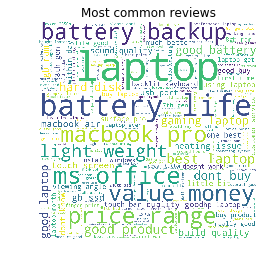

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(height=1000, width=1000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(data['cleaned'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common reviews")
plt.axis('off')
plt.show()

#### still having certain punctuations

In [99]:
import string
def removePunct(text):
    text=text.translate(str.maketrans({key:" {0} ".format(key) for key in string.punctuation}))
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(r'[^\x00-\x7F]+',' ',text_cleaned)# we used to remove \n in between the text
    text_cleaned=re.sub('\s+', ' ',text_cleaned).strip() # to remove punctuations
    return text_cleaned
    

In [100]:
data['cleaned']=data['cleaned'].apply(lambda x:removePunct(x))
data.head(5)

,Unnamed: 0,reviews,cleaned,comp_score,sentiment
0,0,Okay. So you have been seeing people display their Macbooks and you have always fancied owning o...,okay so you have been seeing people display their macbooks and you have always fancied owning on...,0.9976,positive
1,1,It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n,its amazing battery last around 10 12 hrsbest laptop for students and coders,0.5859,positive
2,2,Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.lu...,finally a macbook possession got it in 50k in diwali sale technically good laptopgood newsluxury...,0.4742,negative
3,3,Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for...,best laptop under 60k if you dont want any accounting softwares like tally or busy then go for i...,0.8792,positive
4,4,Pros:1. Light weight and super fast response time2. Highly optimize which avoids any kind of pro...,pros1 light weight and super fast response time2 highly optimize which avoids any kind of proces...,0.9735,positive


#### importing libraries for topic modelling

In [101]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
#from gensim import corpora, models
#import gensim
import nltk
##nltk.download("stopwords")


%autoreload 2

# Visualizations
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import re


import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

UsageError: Line magic function `%autoreload` not found.


#### converting into tokens

In [102]:
tokenizer = RegexpTokenizer(r'\w+') # it coverts python text strings into streams of token objects

In [103]:
data1 = data.cleaned[0]

In [104]:
tokens = tokenizer.tokenize(data1.lower())

In [105]:
print('{} characters in string vs {} words in a list'.format(len(data1),                                                             len(tokens)))
print(tokens[:10])

4463 characters in string vs 840 words in a list
['okay', 'so', 'you', 'have', 'been', 'seeing', 'people', 'display', 'their', 'macbooks']


In [106]:
nltk_stpwd = stopwords.words('english') # identifying the stopwords in english
print(len(set(nltk_stpwd)))
print(nltk_stpwd[:10])


179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [107]:
stopped_tokens = [token for token in tokens if not token in nltk_stpwd] # which are not stopwords
print(stopped_tokens[:10])

['okay', 'seeing', 'people', 'display', 'macbooks', 'always', 'fancied', 'owning', 'one', 'premium']


#### Stemmetization

In [108]:
sb_stemmer = SnowballStemmer('english')#Stemming is the process of producing morphological variants of a root/base word.

In [109]:
stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
print(stemmed_tokens)

['okay', 'see', 'peopl', 'display', 'macbook', 'alway', 'fanci', 'own', 'one', 'premium', 'devic', 'amazon', 'offer', 'macbook', 'air', 'reduc', 'price', 'get', 'tempt', 'buy', 'stop', 'consid', 'get', 'money', 'spend', 'buy', 'think', 'add', 'premium', 'profil', 'devic', 'next', 'line', 'support', 'withdrawn', 'appl', 'resist', 'temptat', 'appl', 'sell', 'last', 'reason', 'buy', 'feel', 'improv', 'profil', 'appl', 'user', 'smirk', 'see', 'obsolet', 'dinosaur', 'devic', 'display', 'latest', 'toysif', 'window', 'user', 'better', 'go', 'friend', 'macbook', 'tri', 'activ', 'mac', 'os', 'great', 'till', 'tri', 'chang', 'someth', 'puni', 'mous', 'cursor', 'realis', 'stuck', 'littl', 'cozi', 'jail', 'appl', 'tri', 'anyth', 'nonstandard', 'tri', 'transfer', 'data', 'usb', 'stick', 'laptop', 'one', 'need', 'train', 'usb', 'partit', 'exfat', 'evn', 'partit', 'mac', 'chanc', 'window', 'recognis', 'usb', 'stick', 'power', 'user', 'real', 'pain', 'cours', 'pretend', 'like', 'mani', 'thousand', 'ap

In [110]:
num_reviews = df.shape[0]
doc_set = [data.cleaned[i] for i in range(num_reviews)]

In [111]:
texts = []

In [112]:
for doc in doc_set:
    tokens = tokenizer.tokenize(doc.lower())
    stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
    stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)
    
print(texts[1])

['amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder']


In [113]:
!pip install gensim #Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.

In [114]:
import gensim #Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. 
from gensim import corpora 
#*Corpora* is a lightweight, fast and scalable corpus library
# it is able to store a collection of raw text documents with additional key-value headers

In [188]:
texts_dict = corpora.Dictionary(texts)
texts_dict.save('cleaned.dict') #elec_review
print(texts_dict)  #### Create a dictionary using corpora

Dictionary(4243 unique tokens: ['24', '3', '5', 'abovea', 'activ']...)


In [189]:
import operator
print("IDs 1 through 10: {}".format(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10]))

IDs 1 through 10: [('24', 0), ('3', 1), ('5', 2), ('abovea', 3), ('activ', 4), ('add', 5), ('advantag', 6), ('ago', 7), ('air', 8), ('alon', 9)]


In [117]:
print(df.cleaned.str.contains("complaint").value_counts()) 
print(df.cleaned.str.contains("excellent").value_counts())

False    3132
True       30
Name: cleaned, dtype: int64
False    2988
True      174
Name: cleaned, dtype: int64


In [118]:
texts_dict.filter_extremes(no_below=30, no_above=0.15) # inlace filter
print(texts_dict)
print("top terms:")
print(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10])

Dictionary(891 unique tokens: ['3', '5', 'activ', 'add', 'advantag']...)
top terms:
[('3', 0), ('5', 1), ('activ', 2), ('add', 3), ('advantag', 4), ('air', 5), ('along', 6), ('alway', 7), ('amount', 8), ('anoth', 9)]


In [119]:
corpus = [texts_dict.doc2bow(text) for text in texts]
len(corpus)

3162

In [120]:
%%time 
# Matrix Market format https://radimrehurek.com/gensim/corpora/mmcorpus.html, why exactly? I don't know
gensim.corpora.MmCorpus.serialize('applelaptops.mm', corpus)

Wall time: 331 ms


In [121]:
lda_model = gensim.models.LdaModel(corpus,alpha='auto', num_topics=5,id2word=texts_dict, passes=20)#Choosing the number of topics based on various categories of laptops on Amazon
lda_model.show_topics(num_topics=5,num_words=5)
raw_query = 'apple laptops'
query_words = raw_query.split()
query = []
for word in query_words:
    # ad-hoc reuse steps from above
    q_tokens = tokenizer.tokenize(word.lower())
    q_stopped_tokens = [word for word in q_tokens if not word in nltk_stpwd]
    q_stemmed_tokens = [sb_stemmer.stem(word) for word in q_stopped_tokens]
    query.append(q_stemmed_tokens[0])
    
print(query)# Words in query will be converted to ids and frequencies  
id2word = gensim.corpora.Dictionary()
_ = id2word.merge_with(texts_dict) # garbage# Convert this document into (word, frequency) pairs
query = id2word.doc2bow(query)
print(query)#Create a sorted list
sorted_list = list(sorted(lda_model[query], key=lambda x: x[1]))
sorted_list#Assessing least related topics
lda_model.print_topic(sorted_list[0][0]) #least related#Assessing most related topics
lda_model.print_topic(sorted_list[-1][0]) #most related

['appl', 'laptop']
[(11, 1)]


'0.017*"pro" + 0.015*"light" + 0.014*"microsoft" + 0.012*"appl" + 0.011*"macbook" + 0.010*"touch" + 0.010*"surfac" + 0.009*"day" + 0.009*"air" + 0.009*"qualiti"'

In [122]:
from collections import Counter

In [123]:
def getMostCommon(cleaned,topn=20):
    reviews_cleaned=" ".join(cleaned)
    tokenised_reviews=reviews_cleaned.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [124]:
reviewlist=data['cleaned'].tolist()

In [125]:
top_words=getMostCommon(reviewlist,20)

In [126]:
import seaborn as sns

In [127]:
# plotting the graph for top words
def plotMostCommonWords(cleaned,topn=50,title="reviewlist",color="blue",axis=None):
    top_words=getMostCommon(cleaned,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

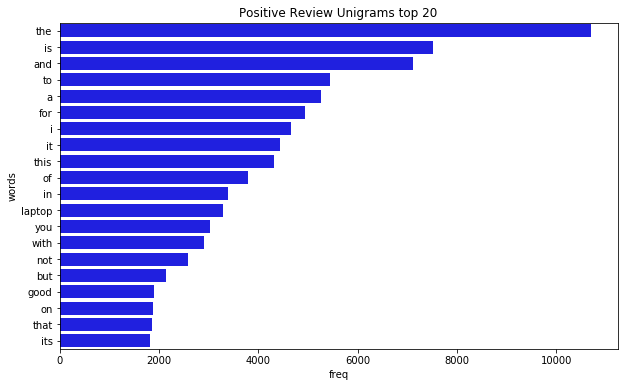

In [128]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,1)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(reviewlist,20,"Positive Review Unigrams")

#### finding the words by ngrams

In [129]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [130]:
positive_reviews_bigrams=[" ".join(generateNGram(cleaned)) for cleaned in reviewlist]


In [131]:
top_20_positive_bigrams=getMostCommon(positive_reviews_bigrams,topn=20)
top_20_positive_bigrams

[('this_laptop', 852),
 ('of_the', 780),
 ('if_you', 648),
 ('is_a', 618),
 ('the_laptop', 618),
 ('is_not', 606),
 ('it_is', 576),
 ('this_is', 576),
 ('you_can', 570),
 ('in_the', 480),
 ('is_the', 420),
 ('i_am', 420),
 ('for_the', 414),
 ('laptop_is', 414),
 ('and_the', 402),
 ('i_have', 396),
 ('for_a', 378),
 ('windows_10', 336),
 ('the_best', 324),
 ('with_the', 324)]

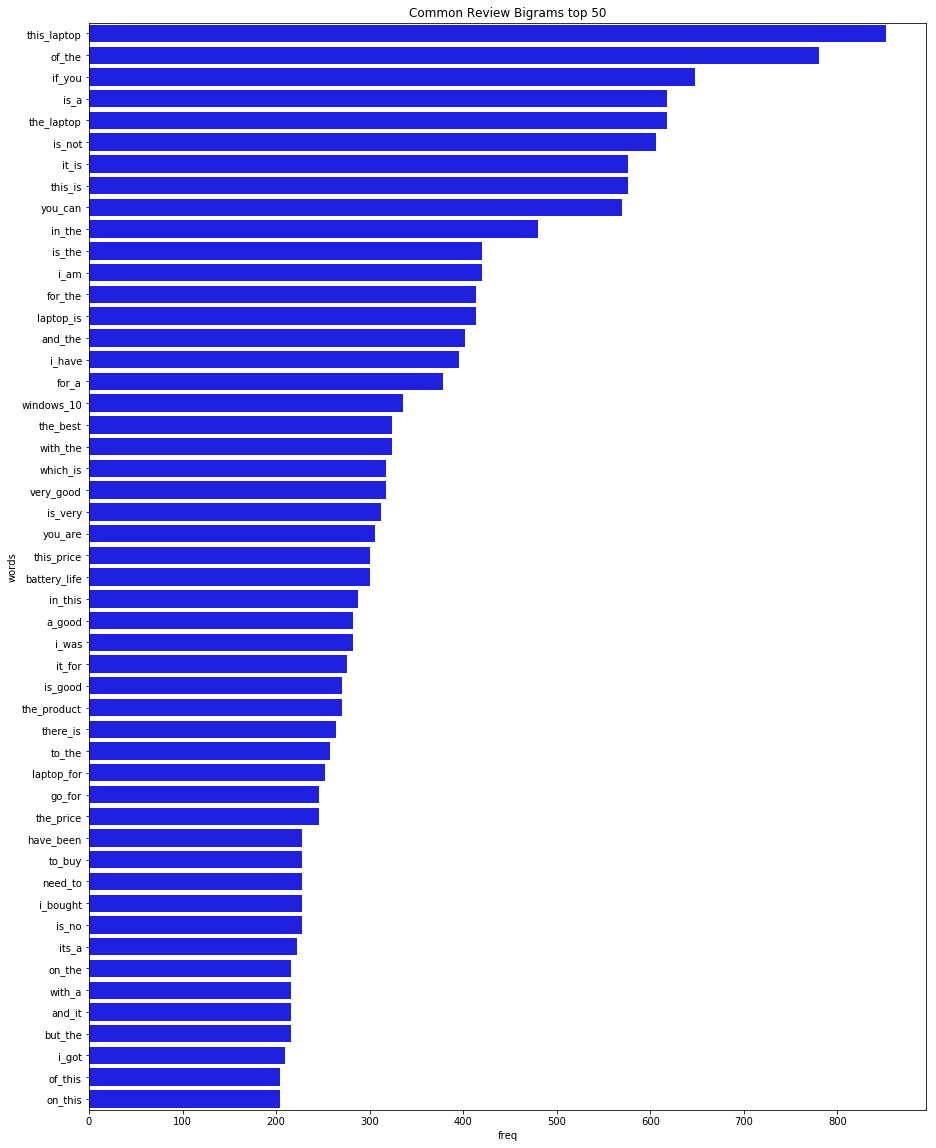

In [132]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,1)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews_bigrams,50,"Common Review Bigrams")

#### installing the libraries for sentimental analysis

In [133]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [134]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [135]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print(score)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))

##### for example let us consider for checking the sentiment score for a sentence

In [136]:
t=(sentiment_analyzer_scores("The apple laptop is super amazing."))

In [137]:
t.values()

dict_values([0.0, 0.342, 0.658, 0.8271])

In [138]:
t['compound']

0.8271

##### defining a function for all the reviews

In [139]:
def compound_score(text):
    sc=sentiment_analyzer_scores(text)
    return sc['compound']

In [140]:
compound_score("The apple laptop is super amazing")

0.8271

In [141]:
data['comp_score']=data['cleaned'].apply(lambda x:compound_score(x))

In [142]:
data.head(5)

,Unnamed: 0,reviews,cleaned,comp_score,sentiment
0,0,Okay. So you have been seeing people display their Macbooks and you have always fancied owning o...,okay so you have been seeing people display their macbooks and you have always fancied owning on...,0.9976,positive
1,1,It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n,its amazing battery last around 10 12 hrsbest laptop for students and coders,0.5859,positive
2,2,Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.lu...,finally a macbook possession got it in 50k in diwali sale technically good laptopgood newsluxury...,0.4742,negative
3,3,Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for...,best laptop under 60k if you dont want any accounting softwares like tally or busy then go for i...,0.8792,positive
4,4,Pros:1. Light weight and super fast response time2. Highly optimize which avoids any kind of pro...,pros1 light weight and super fast response time2 highly optimize which avoids any kind of proces...,0.9735,positive


#### giving a threshold to divide the emotion according to the compound score

In [143]:
def emotion(score):
    if score>0.5:
        return "positive"
    if score<0.5:
        return "negative"
    if score==0.5:
        return "neutral"

In [144]:
data['sentiment']=data['comp_score'].apply(lambda x:emotion(x))# storing it into a new column called sentiment
data.sample(5)

,Unnamed: 0,reviews,cleaned,comp_score,sentiment
576,576,Meet my expectations.Very smooth and fast and the touch id experience is amazing.\n,meet my expectationsvery smooth and fast and the touch id experience is amazing,0.5859,positive
2167,2167,Value for money\n,value for money,0.3400,negative
1022,1022,"liked size, light weight, windows 10 etcbattery charge life should be increased.\n",liked size light weight windows 10 etcbattery charge life should be increased,0.5994,positive
2992,2992,There is no default operating system booted ...also the guidelines to boot the OS is unavailable...,there is no default operating system booted also the guidelines to boot the os is unavailable wa...,-0.2023,negative
2572,2572,Laptop is nice. It is compact with very good build quality and nice look. Laptop is fast. Bootin...,laptop is nice it is compact with very good build quality and nice look laptop is fast booting i...,0.9747,positive


#### checking the sentiment for both positive and negative

In [145]:
from collections import Counter

In [146]:
positive_reviews=data.loc[data['sentiment']=='positive','cleaned'].tolist()# storing in a new name
positive_reviews[0:5]

['okay so you have been seeing people display their macbooks and you have always fancied owning one of those premium devices now as amazon offers this macbook air at a reduced price you are getting tempted to buy this stop and consider what you get for the money you spend do not buy this if you think this adds some premiumness to your profile it will not because this device is next in line where support will be withdrawn by apple resist temptation because that is what apple sells the last reason to buy should be your feeling that it improves your profile apple users will smirk when they see you with an obsolete dinosaur device as they display their latest toysif you are a windows user better go to some friends macbook and try some activities mac os is great till you try to change something as puny as your mouse cursor you realise that you are stuck in the little cozy jail of apple once you try anything nonstandard try transferring data by a usb stick from your other laptop to this one 

In [147]:
negative_reviews=data.loc[data['sentiment']=='negative','cleaned'].tolist()
negative_reviews[0:5]

['finally a macbook possession got it in 50k in diwali sale technically good laptopgood newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better terrific sense of possession pridebad news problems will be there if you are switching from windows based system very less space in hard disk no cd drive inability to transfer data from mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs rs 400 all printers are not compatible eg the most economical mfd laser printer ricoh sp 111 cant be used huge compatibility issues with pages ms word and keynote powerpoint unless you master it by working on these still mostly the document and slides either do not open in windows environment or have distortion issues you need to s

In [148]:
def getMostCommon(cleaned,topn=20):
    reviews_cleaned=" ".join(cleaned)
    tokenised_reviews=reviews_cleaned.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [149]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)# seeing the top 20 positive names frequently occurs

In [150]:
top_20_positive_review_words

[('the', 8700),
 ('is', 5892),
 ('and', 5724),
 ('a', 4368),
 ('to', 4158),
 ('for', 3996),
 ('it', 3372),
 ('this', 3348),
 ('i', 3300),
 ('of', 3132),
 ('in', 2676),
 ('you', 2646),
 ('laptop', 2622),
 ('with', 2358),
 ('but', 1662),
 ('not', 1620),
 ('good', 1548),
 ('on', 1530),
 ('that', 1452),
 ('its', 1416)]

In [151]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)# seeing the top 20 negative names frequently occurs

In [152]:
top_20_negative_review_words

[('the', 1998),
 ('is', 1620),
 ('and', 1386),
 ('i', 1362),
 ('to', 1284),
 ('it', 1062),
 ('not', 966),
 ('this', 960),
 ('for', 948),
 ('a', 888),
 ('in', 708),
 ('laptop', 660),
 ('of', 654),
 ('product', 582),
 ('with', 540),
 ('but', 474),
 ('very', 444),
 ('that', 414),
 ('have', 396),
 ('its', 396)]

In [153]:
neg_words=[val[0] for val in top_20_negative_review_words]
pos_words=[val[0] for val in top_20_positive_review_words]

set(neg_words) - set(pos_words)

{'have', 'product', 'very'}

In [154]:
set(pos_words) - set(neg_words)

{'good', 'on', 'you'}

### checking the different types of grams like unigram,bigram,trigram

In [155]:
def plotMostCommonWords(cleaned,topn=50,title="Positive Review",color="blue",axis=None):
    top_words=getMostCommon(cleaned,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

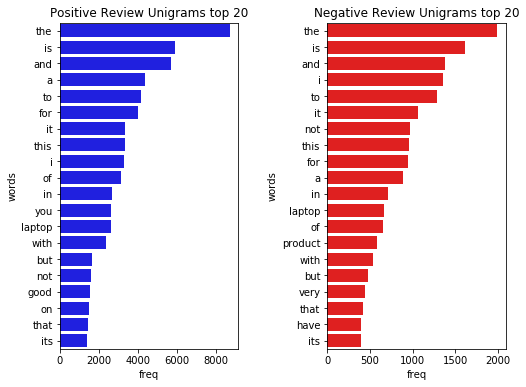

In [156]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [157]:
def generateNGram(text,n=2):# bigram
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [158]:
positive_reviews_bigrams=[" ".join(generateNGram(cleaned)) for cleaned in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(cleaned)) for cleaned in negative_reviews]

In [159]:
positive_reviews_bigrams[0:5]

['okay_so so_you you_have have_been been_seeing seeing_people people_display display_their their_macbooks macbooks_and and_you you_have have_always always_fancied fancied_owning owning_one one_of of_those those_premium premium_devices devices_now now_as as_amazon amazon_offers offers_this this_macbook macbook_air air_at at_a a_reduced reduced_price price_you you_are are_getting getting_tempted tempted_to to_buy buy_this this_stop stop_and and_consider consider_what what_you you_get get_for for_the the_money money_you you_spend spend_do do_not not_buy buy_this this_if if_you you_think think_this this_adds adds_some some_premiumness premiumness_to to_your your_profile profile_it it_will will_not not_because because_this this_device device_is is_next next_in in_line line_where where_support support_will will_be be_withdrawn withdrawn_by by_apple apple_resist resist_temptation temptation_because because_that that_is is_what what_apple apple_sells sells_the the_last last_reason reason_to to

In [160]:
top_20_positive_bigrams=getMostCommon(positive_reviews_bigrams,topn=20)
top_20_positive_bigrams

[('this_laptop', 666),
 ('of_the', 648),
 ('if_you', 576),
 ('is_a', 552),
 ('you_can', 522),
 ('the_laptop', 510),
 ('it_is', 426),
 ('this_is', 426),
 ('in_the', 402),
 ('for_the', 372),
 ('is_the', 366),
 ('and_the', 366),
 ('for_a', 330),
 ('laptop_is', 324),
 ('is_not', 318),
 ('the_best', 312),
 ('i_am', 294),
 ('you_are', 276),
 ('i_have', 264),
 ('this_price', 264)]

In [161]:
top_20_negative_bigrams=getMostCommon(negative_reviews_bigrams,topn=20)
top_20_negative_bigrams

[('is_not', 288),
 ('this_laptop', 186),
 ('this_is', 150),
 ('it_is', 150),
 ('the_product', 138),
 ('of_the', 132),
 ('i_have', 132),
 ('i_am', 126),
 ('i_bought', 114),
 ('the_laptop', 108),
 ('this_product', 108),
 ('to_buy', 90),
 ('have_been', 90),
 ('laptop_is', 90),
 ('bought_it', 84),
 ('not_working', 84),
 ('is_very', 84),
 ('windows_10', 84),
 ('in_the', 78),
 ('if_you', 72)]

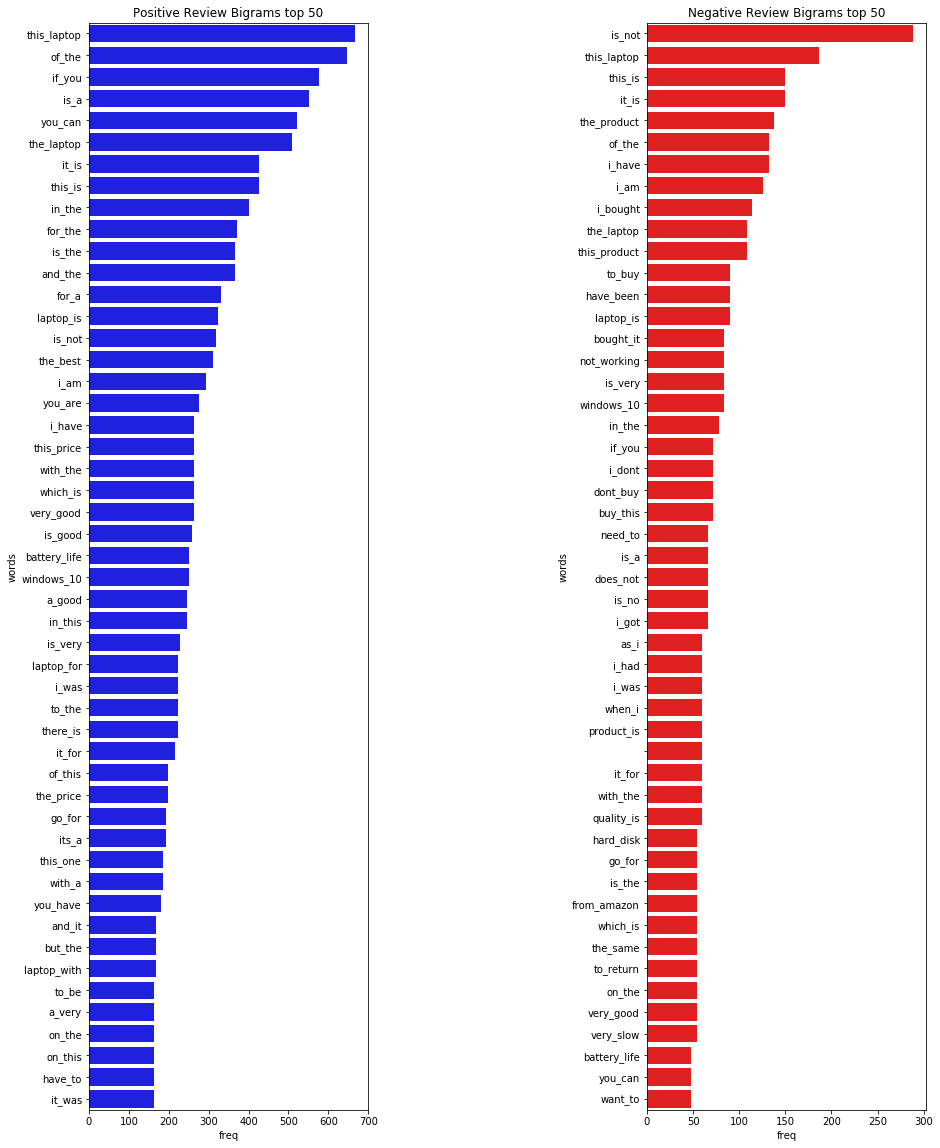

In [162]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews_bigrams,50,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,50,"Negative Review Bigrams",color="red",axis=ax[1])

In [163]:
def generateNGram(text,n=3):# trigram
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [164]:
positive_reviews_trigrams=[" ".join(generateNGram(cleaned)) for cleaned in positive_reviews]
negative_reviews_trigrams=[" ".join(generateNGram(cleaned)) for cleaned in negative_reviews]

In [165]:
top_20_positive_trigrams=getMostCommon(positive_reviews_trigrams,topn=20)
top_20_positive_trigrams

[('if_you_are', 162),
 ('the_laptop_is', 144),
 ('there_is_no', 144),
 ('value_for_money', 138),
 ('in_this_price', 138),
 ('this_is_a', 126),
 ('is_the_best', 102),
 ('this_is_the', 102),
 ('this_price_range', 102),
 ('at_this_price', 96),
 ('go_for_it', 96),
 ('one_of_the', 96),
 ('you_can_get', 96),
 ('this_laptop_is', 84),
 ('a_lot_of', 78),
 ('the_product_is', 72),
 ('of_this_laptop', 72),
 ('out_of_the', 72),
 ('is_one_of', 72),
 ('if_you_have', 66)]

In [166]:
top_20_negative_trigrams=getMostCommon(negative_reviews_trigrams,topn=20)
top_20_negative_trigrams

[('', 96),
 ('i_bought_it', 48),
 ('this_is_the', 36),
 ('does_not_have', 36),
 ('there_is_no', 36),
 ('is_not_working', 36),
 ('not_able_to', 36),
 ('i_dont_know', 30),
 ('to_return_the', 30),
 ('i_am_not', 30),
 ('in_this_price', 30),
 ('is_not_good', 30),
 ('please_dont_buy', 30),
 ('if_you_are', 24),
 ('i_had_to', 24),
 ('value_for_money', 24),
 ('i_bought_this', 24),
 ('this_laptop_and', 24),
 ('this_is_not', 24),
 ('is_not_a', 24)]

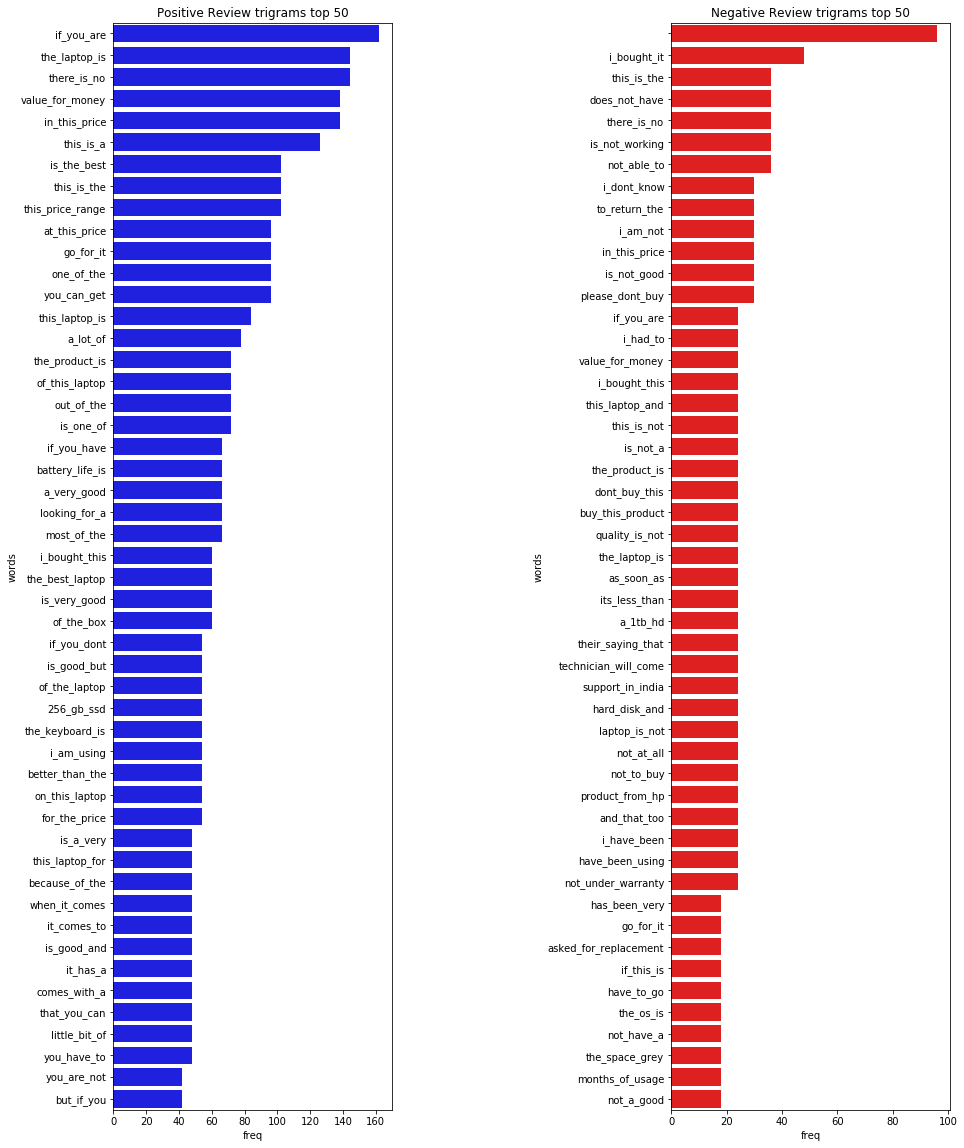

In [167]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews_trigrams,50,"Positive Review trigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_trigrams,50,"Negative Review trigrams",color="red",axis=ax[1])

In [168]:
data.head(5)

,Unnamed: 0,reviews,cleaned,comp_score,sentiment
0,0,Okay. So you have been seeing people display their Macbooks and you have always fancied owning o...,okay so you have been seeing people display their macbooks and you have always fancied owning on...,0.9976,positive
1,1,It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n,its amazing battery last around 10 12 hrsbest laptop for students and coders,0.5859,positive
2,2,Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.lu...,finally a macbook possession got it in 50k in diwali sale technically good laptopgood newsluxury...,0.4742,negative
3,3,Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for...,best laptop under 60k if you dont want any accounting softwares like tally or busy then go for i...,0.8792,positive
4,4,Pros:1. Light weight and super fast response time2. Highly optimize which avoids any kind of pro...,pros1 light weight and super fast response time2 highly optimize which avoids any kind of proces...,0.9735,positive


#### wordcloud for positive and negative words

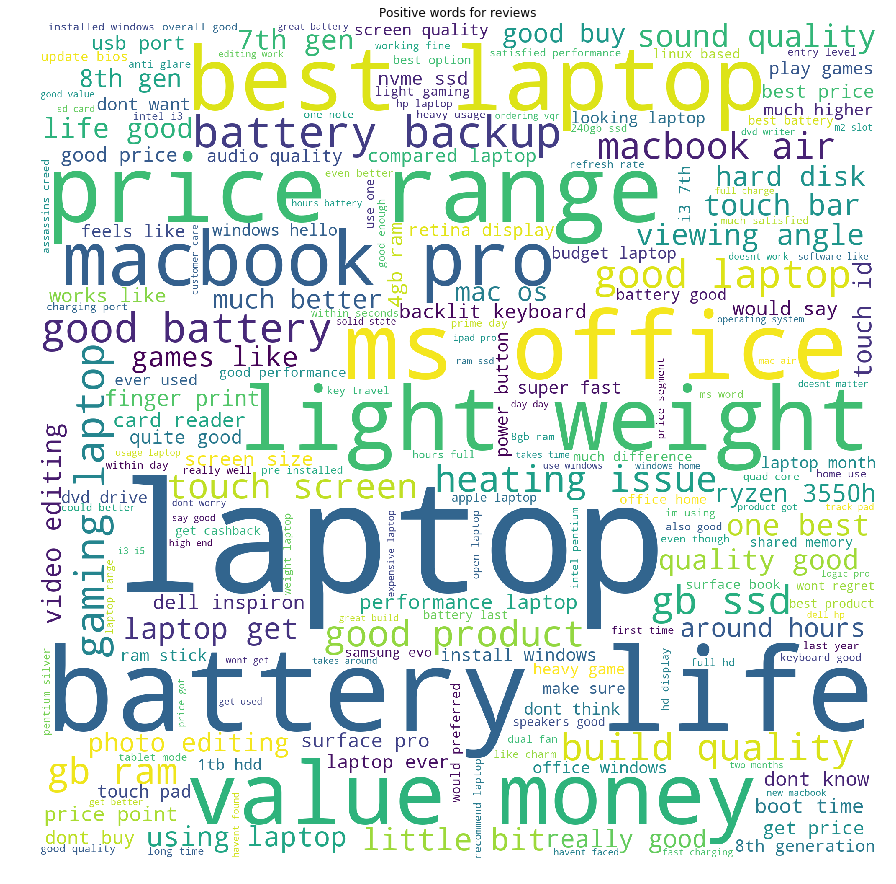

In [169]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(data.loc[data['sentiment']=='positive','cleaned'].tolist()))
plt.imshow(wordcloud)
plt.title("Positive words for reviews")#positive words
plt.axis('off')
plt.show()

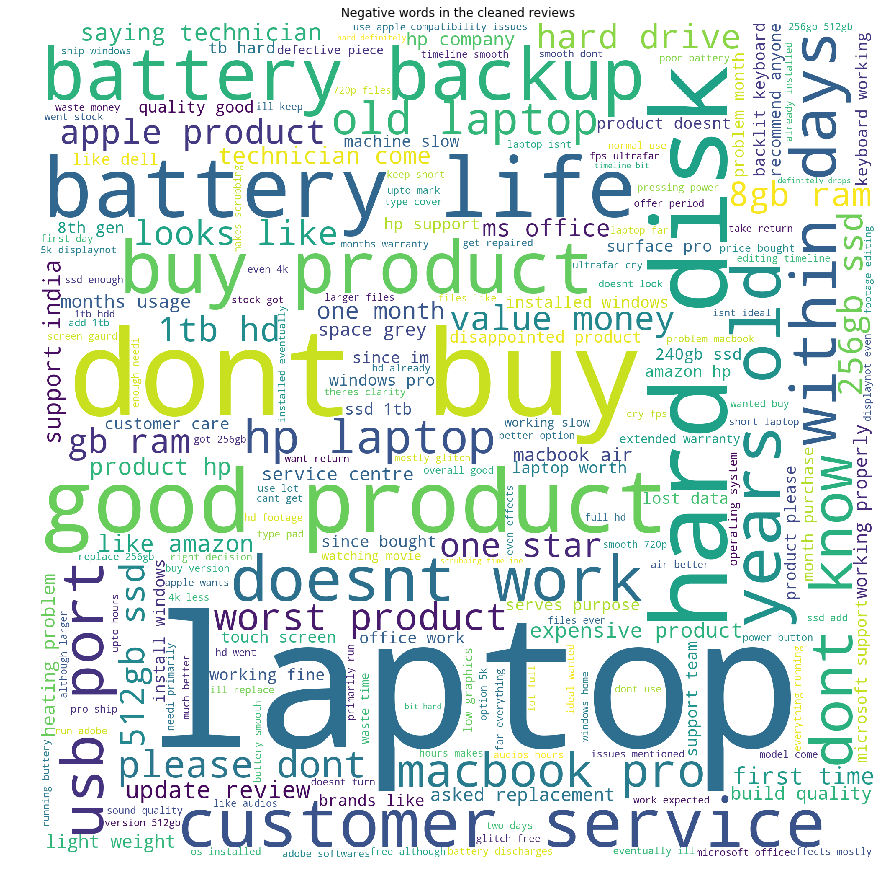

In [170]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(data.loc[data['sentiment']=='negative','cleaned'].tolist()))
plt.imshow(wordcloud)
plt.title("Negative words in the cleaned reviews")# negative words
plt.axis('off')
plt.show()

In [171]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)

In [172]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(data['cleaned'])
print(tfidf_model)

  (0, 3322)	0.03176487171464822
  (0, 4371)	0.06801847614960978
  (0, 5302)	0.3363267658884292
  (0, 2252)	0.04204084573605365
  (0, 766)	0.014794590742069673
  (0, 4185)	0.02730592220174825
  (0, 3497)	0.038531571488998134
  (0, 1515)	0.028022898631195642
  (0, 4710)	0.057116029540460335
  (0, 2927)	0.029000540336773312
  (0, 554)	0.16061668878444305
  (0, 529)	0.04005182306384441
  (0, 1854)	0.03176487171464822
  (0, 3422)	0.03176487171464822
  (0, 3332)	0.060549915605376516
  (0, 3292)	0.1457253823333542
  (0, 4758)	0.04005182306384441
  (0, 3657)	0.08377007172605358
  (0, 1457)	0.0546118444034965
  (0, 3259)	0.013600010963997367
  (0, 639)	0.07853702910572807
  (0, 534)	0.012988736723091775
  (0, 3299)	0.020615626736317793
  (0, 4745)	0.20664460612113583
  (0, 2925)	0.08154271001271003
  :	:
  (3155, 4504)	0.2851769410959081
  (3156, 2583)	0.234837524360033
  (3156, 3394)	0.4503307895760972
  (3156, 5266)	0.5148418487667736
  (3156, 4887)	0.6906456311818895
  (3157, 2583)	0.2348375

In [173]:
print(tfidf_model.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [174]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

,03,05,08,10,100,1011,1014,101tu,10360,105,...,youtube,youve,yrs,yup,zero,zeroed,zone,zones,zoomed,zooming
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.197477,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.016733,0.0,0.040013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
df_1=data.copy()

In [177]:
df_1.head()

,Unnamed: 0,reviews,cleaned,comp_score,sentiment
0,0,Okay. So you have been seeing people display their Macbooks and you have always fancied owning o...,okay so you have been seeing people display their macbooks and you have always fancied owning on...,0.9976,positive
1,1,It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n,its amazing battery last around 10 12 hrsbest laptop for students and coders,0.5859,positive
2,2,Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.lu...,finally a macbook possession got it in 50k in diwali sale technically good laptopgood newsluxury...,0.4742,negative
3,3,Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for...,best laptop under 60k if you dont want any accounting softwares like tally or busy then go for i...,0.8792,positive
4,4,Pros:1. Light weight and super fast response time2. Highly optimize which avoids any kind of pro...,pros1 light weight and super fast response time2 highly optimize which avoids any kind of proces...,0.9735,positive
